# Import Libraries

In [3]:
import pandas as pd #For read/write operations on csv file
import numpy as np #For numerical tasks
import matplotlib.pyplot as plt #Displaying results in graphical format

## Load Dataset

In [4]:
dataset = pd.read_csv('student_info.csv') #Reading csv file

In [5]:
dataset.shape #Returns total rows and columns

(200, 2)

In [6]:
dataset.head() #Displays first 5 records from dataset

,Hours,Scores
0,6.83,78.50
1,6.56,76.74
2,NaN,78.68
3,5.67,71.82
4,8.67,84.19


In [7]:
dataset.tail() #Displays last 5 records from dataset

,Hours,Scores
195,7.53,81.67
196,8.56,84.68
197,8.94,86.75
198,6.60,78.05
199,8.35,83.50


# Discover and visualize the data to gain insights

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   195 non-null    float64
 1   Scores  200 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB


In [9]:
dataset.describe() #It applies some default statistical calculations in our dataset

,Hours,Scores
count,195.000000,200.00000
mean,6.995949,77.93375
std,1.253060,4.92570
min,5.010000,68.57000
25%,5.775000,73.38500
50%,7.120000,77.71000
75%,8.085000,82.32000
max,8.990000,86.99000


In [10]:
dataset.columns #Returns the available columns

Index(['Hours', 'Scores'], dtype='object')

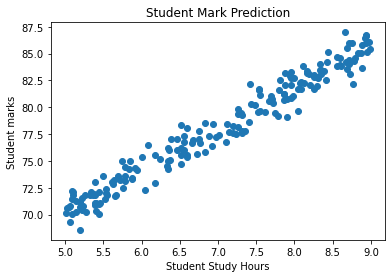

In [11]:
plt.scatter(x=dataset.Hours,y=dataset.Scores) #plt.scatter(dataset['Hours'],dataset['Scores']) or dataset.plot(x='Hours',y='Scores', style='*')
plt.title('Student Mark Prediction')
plt.xlabel('Student Study Hours')
plt.ylabel('Student marks')
plt.show()

# Prepare the data for Machine Learning algorithms

In [12]:
# Data Cleaning

In [13]:
dataset.isnull().any() #Check for any null value

Hours      True
Scores    False
dtype: bool

In [14]:
dataset.isnull().sum() #Returns the sum of total no of null values

Hours     5
Scores    0
dtype: int64

In [15]:
dataset.mean()

Hours      6.995949
Scores    77.933750
dtype: float64

In [16]:
ds = dataset.fillna(dataset.mean()) #Fill the  null value with mean values

In [17]:
ds.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [18]:
#Split Dataset

In [19]:
X = ds.drop("Scores",axis="columns") #Divide data into attributes and labels , X = ds.iloc[:,:-1].values
Y = ds['Scores'].values # Y = ds.drop("Hours",axis="columns") or Y = ds.iloc[:,1]
print("Shape of X = ", X.shape)
print("Shape of y = ", Y.shape)

Shape of X =  (200, 1)
Shape of y =  (200,)


In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=51)
print("Shape of X_train = ", X_train.shape)
print("Shape of y_train = ", Y_train.shape)
print("Shape of X_test = ", X_test.shape)
print("Shape of y_test = ", Y_test.shape)

Shape of X_train =  (140, 1)
Shape of y_train =  (140,)
Shape of X_test =  (60, 1)
Shape of y_test =  (60,)


# Select a model and train it

In [21]:
# y = m*x + c
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [22]:
model.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [23]:
model.coef_

array([3.9391835])

In [24]:
model.intercept_

50.47174681547897

## Fine-tune your model

In [25]:
model.score(X_test,Y_test) # Accuracy

0.9524931690615

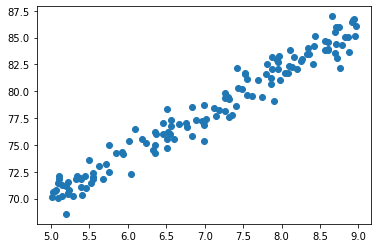

In [26]:
plt.scatter(X_train,Y_train)

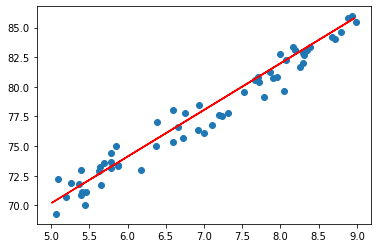

In [27]:
plt.scatter(X_test, Y_test)
plt.plot(X_train, model.predict(X_train), color = "r")

# Save the model

In [28]:
import joblib

In [29]:
joblib.dump(model,"student_mark_predictor.pkl")

['student_mark_predictor.pkl']

In [34]:
lr = joblib.load("student_mark_predictor.pkl")
lr.predict([[5]])[0]

70.16766430501457